In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
model = torch.nn.Linear (in_features=1, out_features=1)#, bias=True)
model.weight, model.bias

(Parameter containing:
 tensor([[-0.8086]], requires_grad=True), Parameter containing:
 tensor([-0.0580], requires_grad=True))

In [3]:
loss = torch.nn.MSELoss ()

In [4]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [115]:
ndata = 100
x = np.random.rand(ndata,1).astype(np.float32)
y = 3 * x + 5 + np.random.randn(ndata,1).astype(np.float32)*0.5

(100, 1) (100, 1)


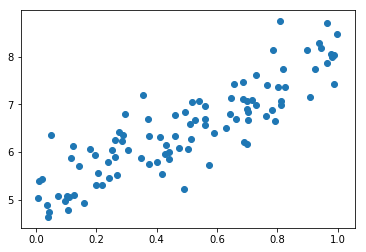

In [116]:
print (y.shape, x.shape); 
plt.scatter (x, y)

In [117]:
from torch.utils.data import Dataset, DataLoader
class myDataSet (Dataset):
    def __init__ (self, x, y):
        self.x = x
        self.y = y
        self.size = x.shape[0]
    def __len__ (self): 
        return self.size
    def __getitem__ (self, idx):
        return x[idx], y[idx]

In [118]:
data = myDataSet (x, y)

In [119]:
for i, (xx, yy) in enumerate(data):
    print (i, xx, yy)
    if i>5: break

0 [0.35491827] [7.1995616]
1 [0.71792245] [7.08749]
2 [0.49378633] [6.8478174]
3 [0.43260458] [6.1391206]
4 [0.6897085] [6.2114835]
5 [0.5607634] [6.5579333]
6 [0.5394859] [7.0659924]


In [120]:
myDataLoader = DataLoader (data, batch_size=10)
next(iter(myDataLoader))

[tensor([[0.3549],
         [0.7179],
         [0.4938],
         [0.4326],
         [0.6897],
         [0.5608],
         [0.5395],
         [0.1790],
         [0.1432],
         [0.1973]]), tensor([[7.1996],
         [7.0875],
         [6.8478],
         [6.1391],
         [6.2115],
         [6.5579],
         [7.0660],
         [6.0644],
         [5.7100],
         [5.9277]])]

In [124]:
#def fit (model, loss_ft, optim, nepochs=10):
nepochs = 300
for epoch in range (1,nepochs+1):
    e = 0.
    for i, data in enumerate(myDataLoader):
        inp, outp = data

        optimizer.zero_grad ()
        
        outpred = model (inp)
        err = loss (outpred, outp)
        
        err.backward ()
        e += err.item()
        optimizer.step ()
    #
    e /= ndata
    if epoch % 10 == 0:
        print (epoch, '{:.2e}'.format(e), model.weight.data.item(), model.bias.data)

10 2.23e-02 2.925825357437134 tensor([5.0305])
20 2.23e-02 2.925825357437134 tensor([5.0305])
30 2.23e-02 2.925825357437134 tensor([5.0305])
40 2.23e-02 2.925825357437134 tensor([5.0305])
50 2.23e-02 2.925825357437134 tensor([5.0305])
60 2.23e-02 2.925825357437134 tensor([5.0305])
70 2.23e-02 2.925825357437134 tensor([5.0305])
80 2.23e-02 2.925825357437134 tensor([5.0305])
90 2.23e-02 2.925825357437134 tensor([5.0305])
100 2.23e-02 2.925825357437134 tensor([5.0305])
110 2.23e-02 2.925825357437134 tensor([5.0305])
120 2.23e-02 2.925825357437134 tensor([5.0305])
130 2.23e-02 2.925825357437134 tensor([5.0305])
140 2.23e-02 2.925825357437134 tensor([5.0305])
150 2.23e-02 2.925825357437134 tensor([5.0305])
160 2.23e-02 2.925825357437134 tensor([5.0305])
170 2.23e-02 2.925825357437134 tensor([5.0305])
180 2.23e-02 2.925825357437134 tensor([5.0305])
190 2.23e-02 2.925825357437134 tensor([5.0305])
200 2.23e-02 2.925825357437134 tensor([5.0305])
210 2.23e-02 2.925825357437134 tensor([5.0305])
2